## Zadanie

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

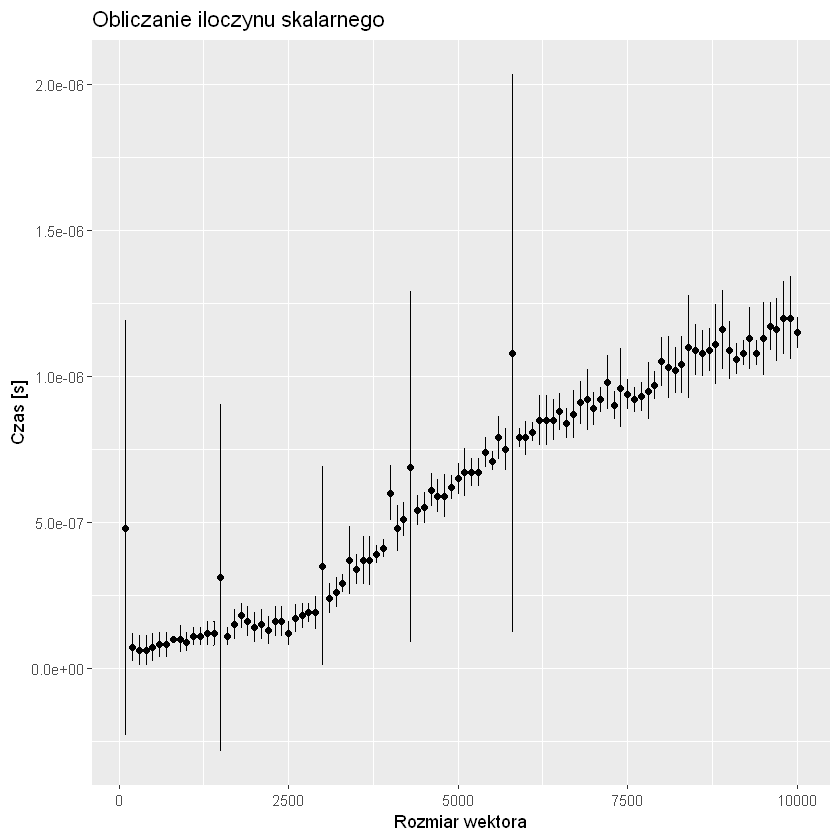

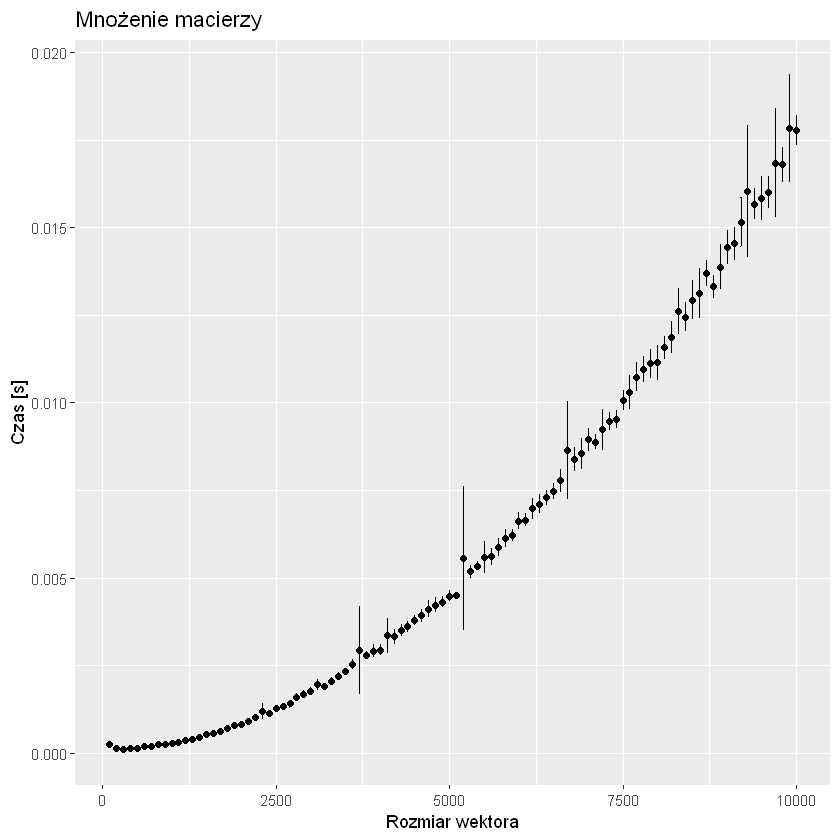

In [4]:
library("tidyverse")

# Wczytujemy dane z pliku CSV
results = read.csv("results.csv")

# Grupujemy dane po rozmiarze wektora i nazwie funkcji
avg_results <- aggregate(time ~ vector_size:function_name, data=results, FUN=mean)

# Dodajemy kolumnę z odchyleniem standardowym
avg_results$sd <- aggregate(time ~ vector_size:function_name, data=results, FUN=sd)$time

# Filtrujemy dane po nazwie funkcji i rozdzielamy do dwóch osobnych tabeli
avg_results_dot_product <- avg_results[avg_results$function_name=="dot_product",]
avg_results_matrix_vector_multiply <- avg_results[avg_results$function_name=="matrix_vector_multiply",]

# Rysujemy 2 wykresy ze słupkami błędów, podpisanymi osiami i tytułami
ggplot(avg_results_dot_product, aes(vector_size, time)) + geom_point() + geom_errorbar(aes(ymin = time-sd, ymax = time+sd, width=.25)) + ylab("Czas [s]") + xlab("Rozmiar wektora") + ggtitle("Obliczanie iloczynu skalarnego")
ggplot(avg_results_matrix_vector_multiply, aes(vector_size, time)) + geom_point() + geom_errorbar(aes(ymin = time-sd, ymax = time+sd, width=.25)) + ylab("Czas [s]") + xlab("Rozmiar wektora") + ggtitle("Mnożenie macierzy")